In [95]:
with open('input6.txt', 'r') as f:
    x = f.readlines()
    
y = [s[:-1] for s in x]
y = y[:-1]
y1 = [s.split(')') for s in y]


In [74]:
def nodes_and_edges(listForm):
    edges = [s.split(')') for s in listForm]
    nodes = []
    for pair in edges: 
        for x in pair:
            # check if exists in unique_list or not 
            if x not in nodes: 
                nodes.append(x) 
    return nodes, edges

In [76]:
test = ['COM)B', 'B)C',  'C)D',  'D)E', 'E)F', 'B)G', 'G)H', 'D)I', 'E)J', 'J)K', 'K)L']
print(nodes_and_edges(test)[0])

['COM', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


In [107]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from(nodes_and_edges(test)[1])

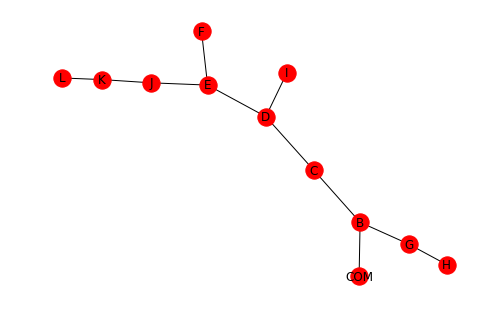

In [108]:
pos=nx.spring_layout(G,iterations=100)
nx.draw(G, pos)
labels=nx.draw_networkx_labels(G,pos)

In [109]:
# the number of orbits is the sum of the number of edges between COM and all other nodes

num_edges = 0
edges1 = []
#go through all nodes except COM and count the edges from COM to each:
for n in nodes_and_edges(test)[0][1:]:
    num_edges += nx.shortest_path_length(G, source='COM', target=n)
print(num_edges)

    

42


Now that the test worked, let's count the edges for the input:

In [113]:
#create the graph:
Gf = nx.Graph()
Gf.add_edges_from(nodes_and_edges(y)[1])

#get nodes except 'COM'
nodes_wo_com = [nd for nd in nodes_and_edges(y)[0] if nd != 'COM']

num_edges = 0
edges1 = []
#go through all nodes except COM and count the edges from COM to each:
for n in nodes_wo_com:
    num_edges += nx.shortest_path_length(Gf, source='COM', target=n)
print(num_edges)


295936


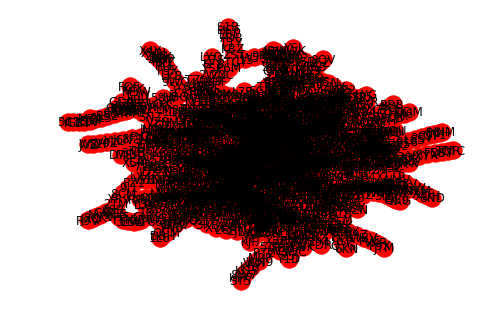

In [111]:
#drawing it out of curiosity:
pos=nx.spring_layout(Gf,iterations=100)
nx.draw(Gf, pos)
labels=nx.draw_networkx_labels(Gf,pos)

In [115]:
target = list(Gf.neighbors('SAN'))[0]
print(target)
source = 'YOU'
path_length = nx.shortest_path_length(Gf, source=source, target=target)

HZ2


In [117]:
print(path_length-1)

457
